# Warm Up Quiz
## VCS Lab Special Project
電機工程學系　102061152　呂志娟

# 0. Basic Investigation


### Q2 是否修過“計算機程式設計、訊號與系統、線性代數、邏輯設計” ?
Grades are listed below:

|Subject                     |Grade |
|----------------------------|:----:|
|Introduction to Programming |A+    |
|Signals and Systems         |B     |
|Linear Algebra              |B+    |
|Logical Design              |A-    |

### Q3 是否有攝影、改圖、玩photoshop(or之類的軟體)的經驗?
有使用photoshop、illustrator等繪圖軟體的經驗。
大一大二在個活動中做過數次美工相關股長，宣傳照修圖、表演節目冊等都做過。

### Q4 預期一周能夠花幾個小時在這個專題上呢(in hours)?
雖然不曉得多少時間才算夠或多，不過我以之前做project所費時間來看的話，估計一個禮拜中4-5天耗費2小時

# 1. 數位照片的形成
![Alt text](img/pinhole.png)

### Q1.  我想要拍攝一個高150公尺，寬150公尺的建築物那麼我應該距離多遠拍攝才能恰巧將建築物拍進照片裡呢?
![Alt text](img/1-1.png)
$$\frac{5}{2}=\frac{x}{150}$$
<br>
$$x=375$$

### Q2. 現在假設你只有4MB的儲存空間可以用來存一張照片，你會怎麼設計你的感光元件來存照片呢(不考慮壓縮)? 


### Q3. 假設建築物上有週期性排放的窗戶，長寬0.05公尺，間隔0.05公尺你覺得依照你在Q2中設計的感光元件能夠從照片中分辨出這些窗戶嗎?


### Q4. 假設建築物上窗戶的顏色是縱向漸層的，並且有1500種亮度變化，你覺得依照你在Q2中設計的感光元件能夠從照片中分辨出這些窗戶的亮度差異嗎?

### Q5.  現在給你個機會重新設計感光元件，你會怎麼做，考量是什麼? 他能夠滿足Q3/Q4中的要求嗎?


### Q6.  很倒楣的，在感光元件上累積電壓的過程中，除了光線造成的電子外，還會受到環境雜訊的影響，他所造成的影響可以想成每秒加入[-1V~1V]隨機出現的且平均為零的電壓，如果是你的話，你會怎麼處理這個問題呢?


# 2. 變動照片

### Q1. 照片中每個點的位置可以用一個數組$[x, y]^T$來表示，如果我現在需要將照片旋轉45度，並且向右平移3.5，那麼我應該怎麼做呢? (可以用方程式、矩陣運算…任何能夠表達清楚的方式來描述新的位置$[x', y']^T$與原先位置的關係)


$$
\begin{bmatrix} x' \\ y' \end{bmatrix}
=
\begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix}\,\,\,\,,\,\theta=45^{\circ}$$
<br>
$$
\begin{bmatrix} x' \\ y' \end{bmatrix}
=
\begin{bmatrix} x'+3.5 \\ y' \end{bmatrix}
$$

### Q2. 由於很不幸的我們念電機系，我們所看到的是數位照片，照片中每個點的位置只能用整數(actually fixed point)表示，那麼你在Q1中描述的公式還能夠使用嗎? 不論可以或不行都請敘述原因，如果不行的話，請說明需要怎麼變動(不一定要以Q1中的關係式表達，只要說清楚需要的變動就好)


The formula in Q1 can no longer be applied because we have $\cos{45^{\circ}}=\frac{\sqrt{2}}{2}\approx0.707$ and horizontal movement 3.5, which resulted in calculation beyond integer(fixed point).
要準確旋轉45度或是平移3.5應是不可能的，姑且不論旋轉，平移3.5即出現了小數運算，所以我們只能將它四捨五入取得最相近的點；對於旋轉的話，則可以同樣道理，但是如果出現iteration碰到已經有對應點的座標時，則要改變捨去為進位或者反向操作，以獲得完整圖形旋轉。

# 3. Signal Edge Detection
![Alt text](img/signal-edge.png)
- 給定一段如上的離散訊號，我們想要找出訊號中突然變化的時間點n，請設計一個演算法(一個程序)，把訊號中突然變化的時間點n自動的偵測出來<注意，連續斜坡中的點不算是突然變化>
- 請用C/C++實現出你所設計的演算法，他至少需要能夠讀取並處理測資xn.dat以及下題的yn.dat，並輸出所有突然變化點的n值

方法如下，當資料讀入後將之存在一個vector中，要找signal edge時就iterate過所有點，判斷是否和前後相同，當前者相同、後者不同或反向的情況，即是我們所要的signal edges<br>
![Alt text](img/result.png)

```
void findEdge(vector<double> f) {
    cout << "Start Find Signal Edge:" << endl;
    for(int i = 1; i < f.size()-1; i++) {
        if(f[i] == f[i-1] && f[i] != f[i+1])
            cout << i << " ";
        if(f[i] != f[i-1] && f[i] == f[i+1])
            cout << i << " ";
    }
    cout << endl << "End Find Signal Edge" << endl;
}
```

# 4. Linear Convolution

$$𝐿𝑖𝑛𝑒𝑎𝑟 𝐶𝑜𝑛𝑣𝑜𝑙𝑢𝑡𝑖𝑜𝑛: 𝑦[𝑛]=𝑥[𝑛]\otimesℎ[𝑛]$$
- 在訊號與系統中，有教到convolution，請用C/C++實現一個程式處理兩個訊號(x[n],h[n])做convolution，並且輸出成yn.dat<br>
- y[n]與x[n]長得很相近，但是卻有不同的性質，利用第三題中的程式處理y[n]，並且試著分析y[n]與x[n]兩者的差異，以及造成這個差異的原因


convolution的定義為$y[n] = x[n]\otimes h[n] = \sum\limits_{k=-\infty}^\infty x[k]h[n-k] $<br><br>
For finite sequences x[n] with M values and h[n] with N values:<br>
$y[n]=\sum\limits_{k=0 }^{N }x(n+k)h(N-1-k)\,\,\,\forall\,\,n = 0 ... M+N-2$

```
void conv() {
    int const N  = xn.size() + hn.size() - 1;
    for(int i = 0; i < N; i++) {
        int const jmn = (i >= hn.size() - 1)? i - (hn.size() - 1) : 0;
        int const jmx = (i <  xn.size() - 1)? i : xn.size() - 1;
        double tmp = 0;
        for(int j = jmn; j <= jmx; j++ )
            tmp += (xn[j] * hn[i - j]);
        yn.push_back(tmp);
    }
}
```

透過c++ code的運算(下圖為執行結果)，以及下方python matplotlib的繪圖，我們可以發現xn原本是一個會有大幅度變動的資料，也就是signal edge很鮮明，當我們將他和hn(triangular function)做convolution後得到yn，yn的signal edge和xn的所描繪的區塊基本上沒有太大差異，只是從圖形上可以發現yn的資料邊沒那麼陡了，而是顯得平滑些
![Alt text](img/result.png)

<IPython.core.display.Javascript object>


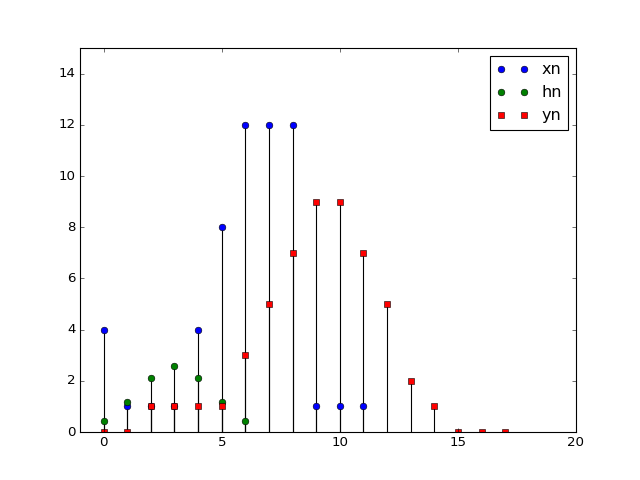

[-1, 20, 0, 15]

In [15]:
%matplotlib notebook

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

with open('xn.dat', 'r', encoding = 'utf-8') as f:
    tmp = f.read()
    x = tmp.split(",")
    x = [int(i) for i in x]

with open('hn.dat', 'r', encoding = 'utf-8') as f:
    tmp = f.read()
    h = tmp.split(",")
    h = [float(i)*10 for i in h]
    
with open('yn.dat', 'r', encoding = 'utf-8') as f:
    tmp = f.read()
    y = tmp.split(",")
    y = [int(i) for i in y]

n = np.array([a for a in range(len(x))])
t = np.array([a for a in range(len(h))])
m = np.array([a for a in range(len(y))])
xn = np.array(x)
hn = np.array(h)
yn = np.array(y)
plt.plot(n, xn, "o", label="xn")
plt.plot(t, hn, "go", label="hn")
plt.plot(m, yn, "rs", label="yn")
plt.vlines(n, [0], xn)
plt.vlines(t, [0], hn)
plt.vlines(m, [0], yn)
plt.legend()
plt.axis([-1, 20, 0, 15])
